# Task
Improve the accuracy of the customer retention prediction model.

In [94]:
# Load dataset
df = pd.read_csv('dataset.csv')

# Basic info
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

print("\nData types & missing values:")
print(df.info())

print("\nTarget distribution (Churn):")
print(df['Target_Churn'].value_counts(normalize=True))

Dataset shape: (1000, 15)

First 5 rows:


,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,1,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,2,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,5,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False



Data types & missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Customer_ID                 1000 non-null   int64  
 1   Age                         1000 non-null   int64  
 2   Gender                      1000 non-null   object 
 3   Annual_Income               1000 non-null   float64
 4   Total_Spend                 1000 non-null   float64
 5   Years_as_Customer           1000 non-null   int64  
 6   Num_of_Purchases            1000 non-null   int64  
 7   Average_Transaction_Amount  1000 non-null   float64
 8   Num_of_Returns              1000 non-null   int64  
 9   Num_of_Support_Contacts     1000 non-null   int64  
 10  Satisfaction_Score          1000 non-null   int64  
 11  Last_Purchase_Days_Ago      1000 non-null   int64  
 12  Email_Opt_In                1000 non-null   bool   
 13  Prom

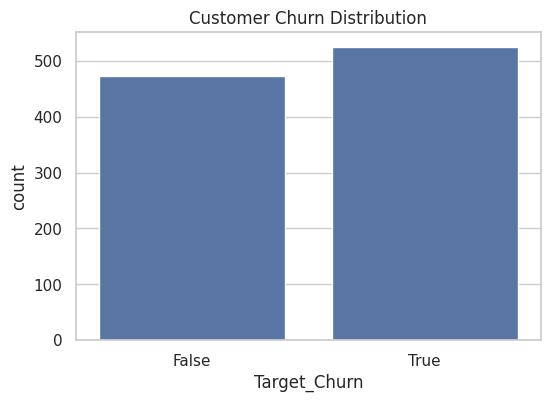

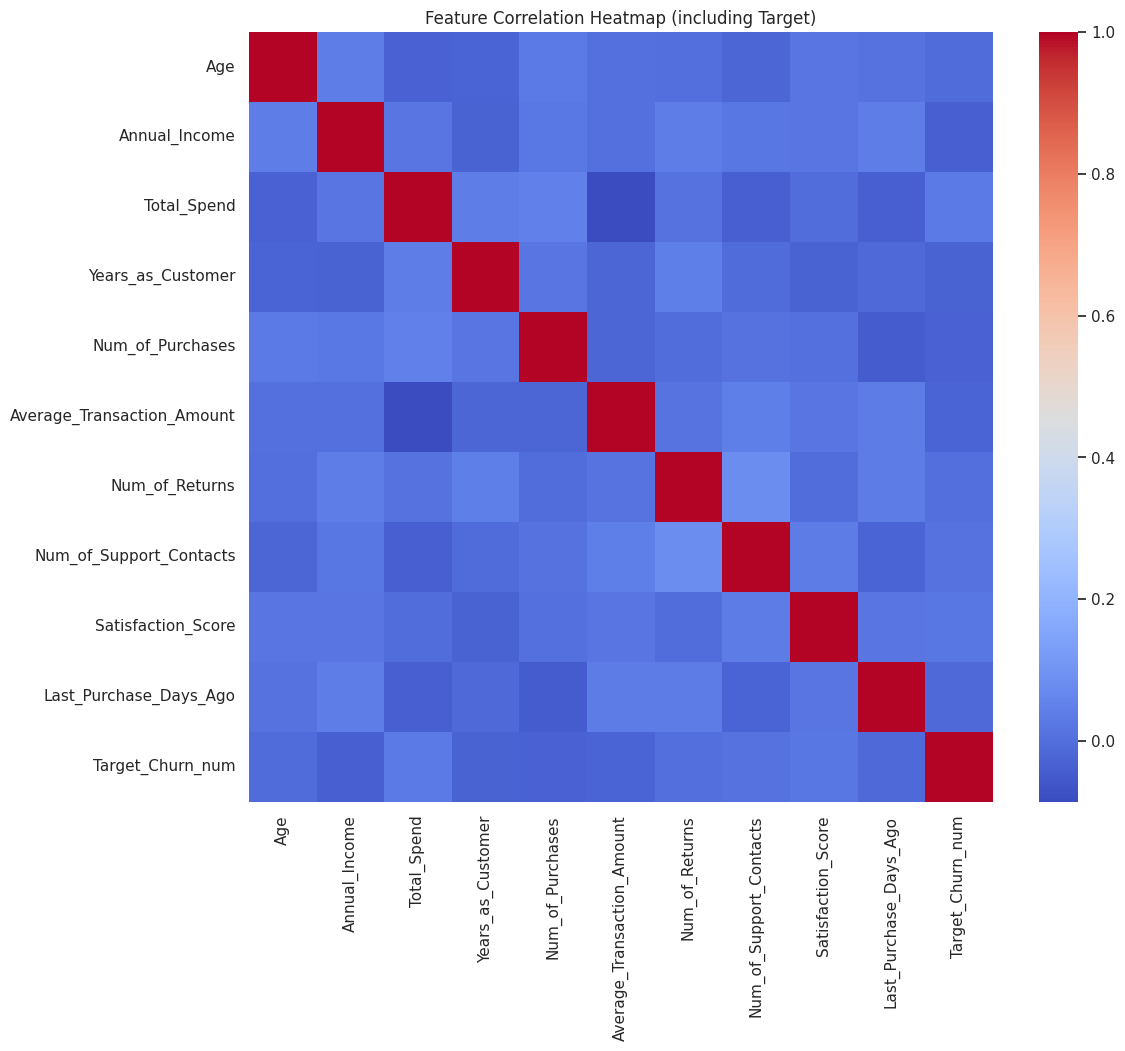

Top 10 features correlated with Churn:
Annual_Income                 0.036322
Num_of_Purchases              0.032772
Years_as_Customer             0.029823
Total_Spend                   0.028659
Average_Transaction_Amount    0.024723
Satisfaction_Score            0.022567
Last_Purchase_Days_Ago        0.013823
Num_of_Support_Contacts       0.009593
Age                           0.009260
Num_of_Returns                0.000061
Name: Target_Churn_num, dtype: float64


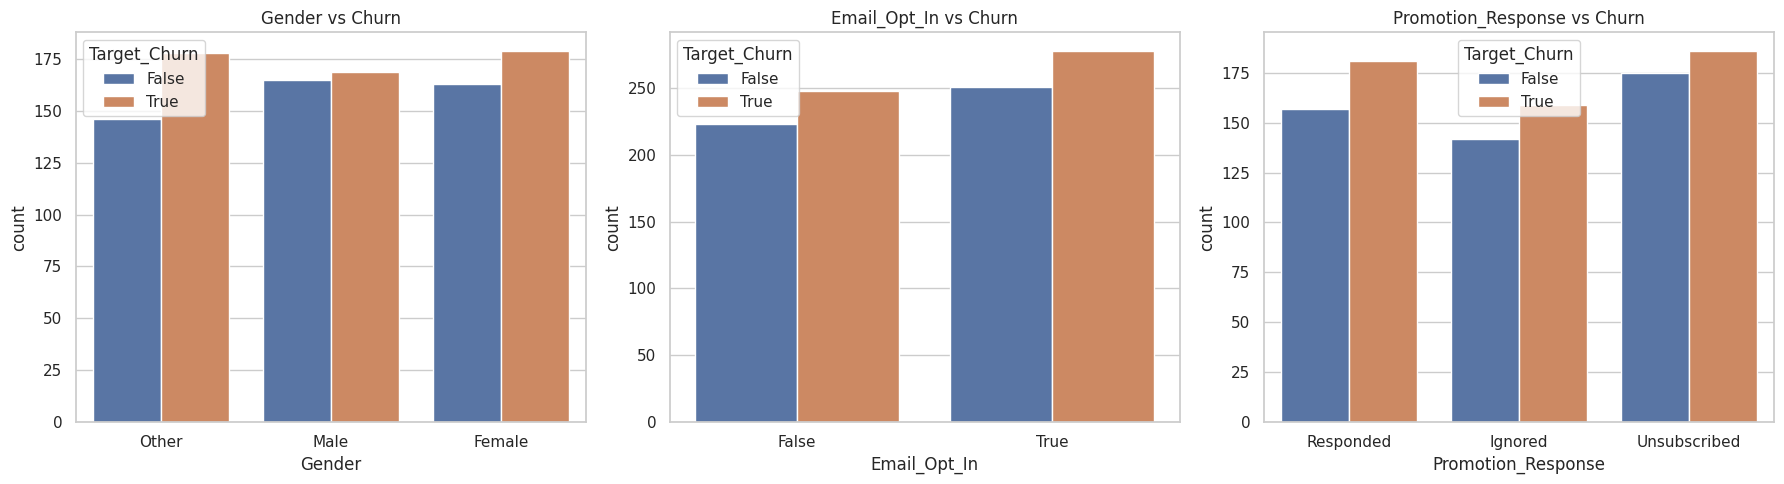

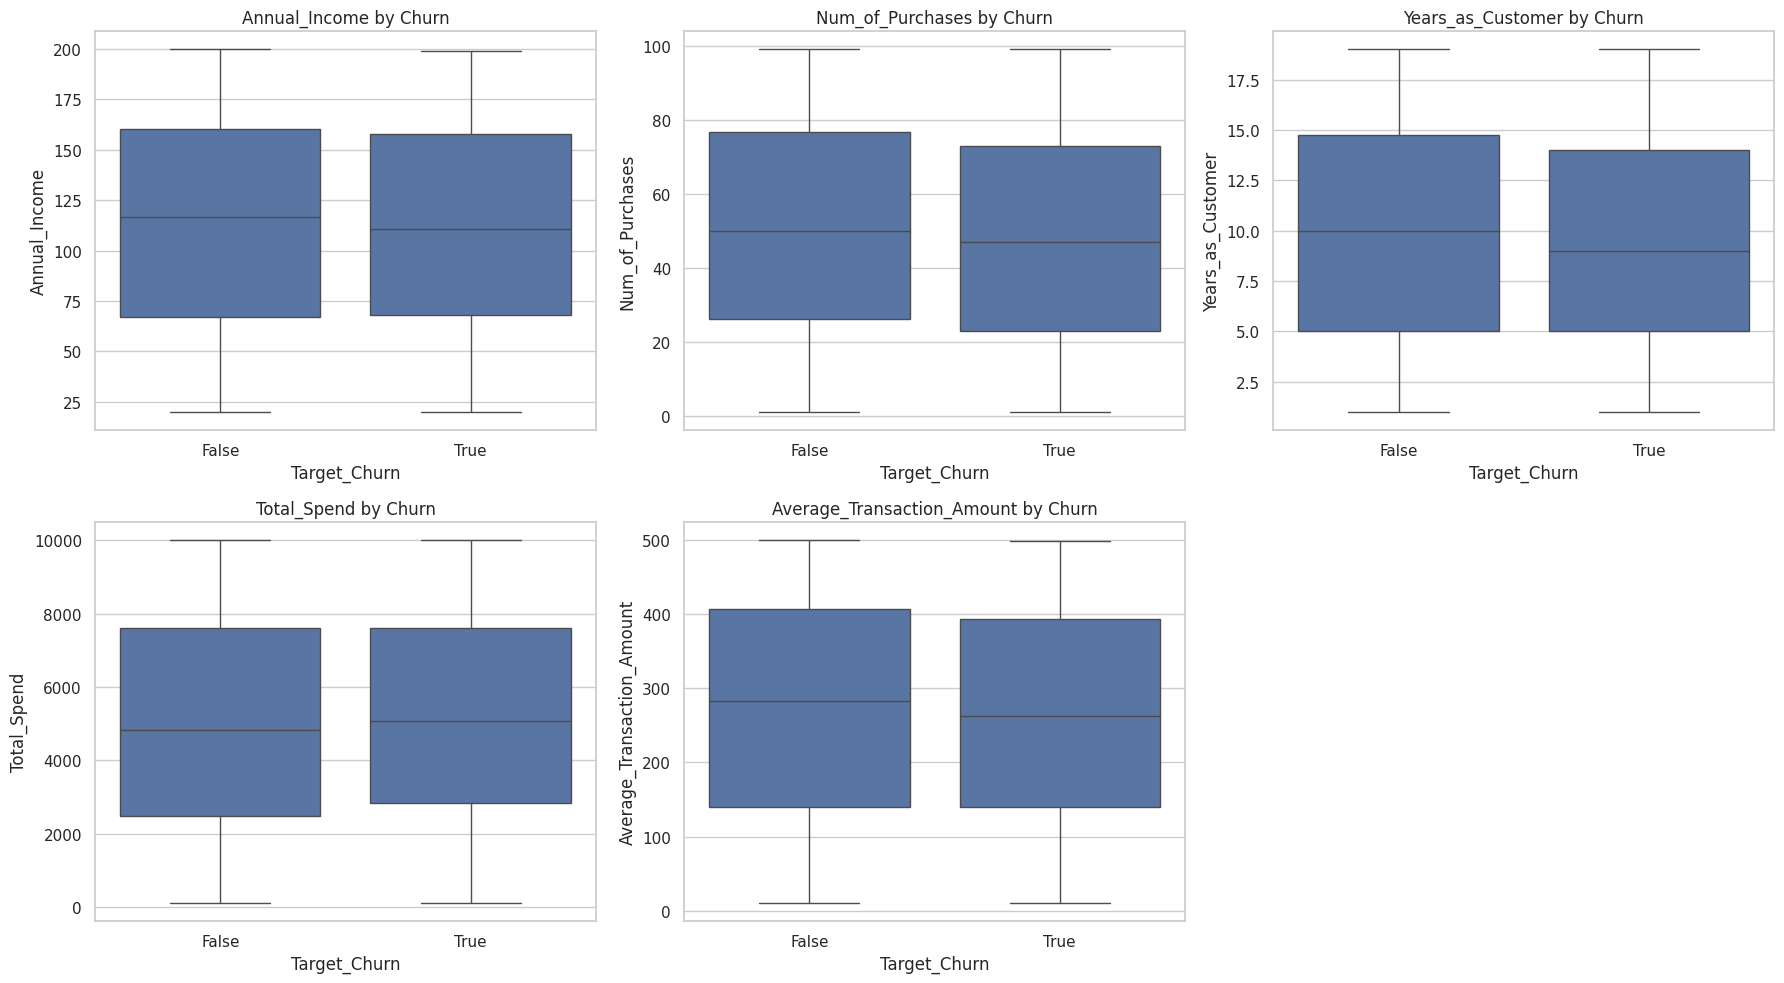

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (assuming df is loaded in a previous cell)
# df = pd.read_csv('dataset.csv')

# 1. Target distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Target_Churn')
plt.title('Customer Churn Distribution')
plt.show()

# Ensure Target_Churn is numeric for correlation calculation
df['Target_Churn_num'] = df['Target_Churn'].astype(int)

# 2. Correlation heatmap (numerical features including the target)
num_cols_with_target = df.select_dtypes(include=[np.number]).columns.tolist()
# Ensure 'Customer_ID' is excluded if it's numeric and not relevant
if 'Customer_ID' in num_cols_with_target:
    num_cols_with_target.remove('Customer_ID')

plt.figure(figsize=(12,10))
corr = df[num_cols_with_target].corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap (including Target)')
plt.show()

# 3. Top features correlated with churn (using the numerical target)
if 'Target_Churn_num' in corr.columns:
    churn_corr = corr['Target_Churn_num'].abs().sort_values(ascending=False)
    print("Top 10 features correlated with Churn:")
    # Exclude Target_Churn_num itself from the top list
    print(churn_corr[1:11])
else:
    print("'Target_Churn_num' not found in correlation matrix. Cannot show top features correlated with Churn.")

# 4. Categorical feature analysis
cat_cols = ['Gender', 'Email_Opt_In', 'Promotion_Response']
fig, axes = plt.subplots(1, 3, figsize=(18,5))
for i, col in enumerate(cat_cols):
    if col in df.columns:
        sns.countplot(data=df, x=col, hue='Target_Churn', ax=axes[i])
        axes[i].set_title(f'{col} vs Churn')
plt.tight_layout()
plt.show()

# 5. Numerical feature distributions by churn
# Use the original num_cols for boxplots
original_num_cols = ['Age', 'Annual_Income', 'Total_Spend', 'Years_as_Customer', 'Num_of_Purchases', 'Average_Transaction_Amount',
                     'Num_of_Returns', 'Num_of_Support_Contacts', 'Satisfaction_Score', 'Last_Purchase_Days_Ago']
# Add the engineered numerical features if they exist
engineered_num_cols = [col for col in ['Spend_per_Purchase', 'Income_to_Spend_Ratio', 'Return_Rate'] if col in df.columns]
plot_num_cols = original_num_cols + engineered_num_cols

# Select top features to plot based on the correlation analysis
features_to_plot = []
if 'Target_Churn_num' in corr.columns:
    features_to_plot = corr['Target_Churn_num'].abs().sort_values(ascending=False).index.tolist()[1:6]
    features_to_plot = [f for f in features_to_plot if f in df.columns]
else:
    features_to_plot = ['Age', 'Total_Spend', 'Years_as_Customer', 'Num_of_Purchases', 'Satisfaction_Score']
    features_to_plot = [f for f in features_to_plot if f in df.columns]

if features_to_plot:
    fig, axes = plt.subplots(nrows=int(np.ceil(len(features_to_plot)/3)), ncols=3, figsize=(18, int(np.ceil(len(features_to_plot)/3))*5))
    axes = axes.ravel()
    for i, col in enumerate(features_to_plot):
        sns.boxplot(data=df, x='Target_Churn', y=col, ax=axes[i])
        axes[i].set_title(f'{col} by Churn')

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()
else:
    print("No numerical features available to plot distributions by churn.")

# Drop the temporary numerical target column
if 'Target_Churn_num' in df.columns:
    df = df.drop('Target_Churn_num', axis=1)

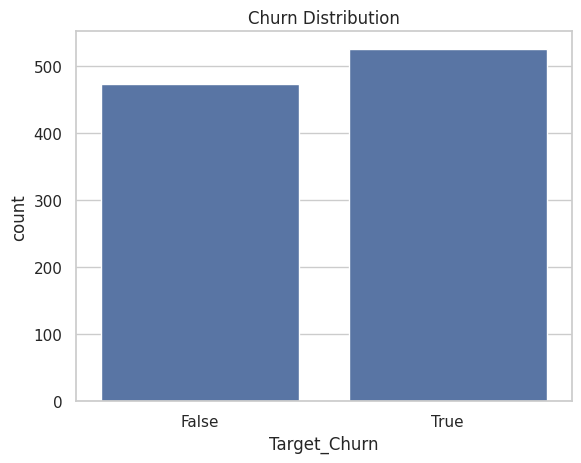

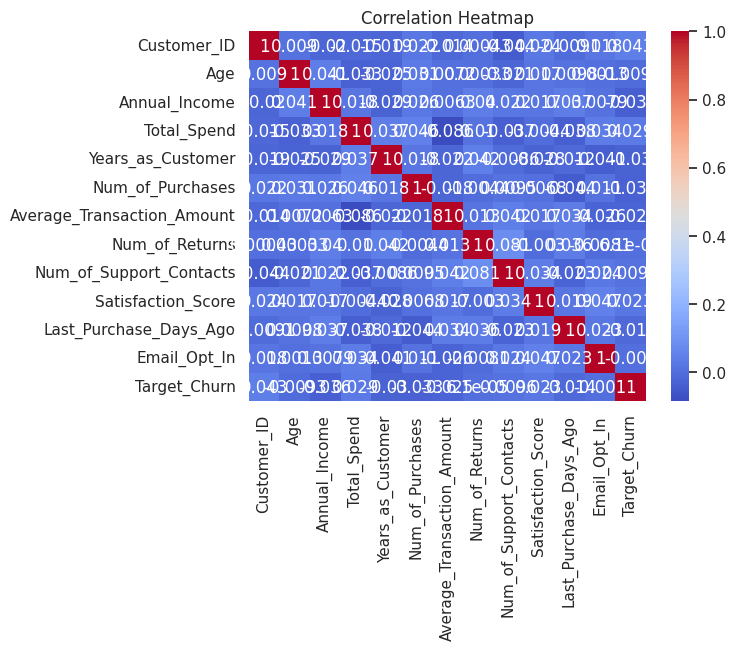

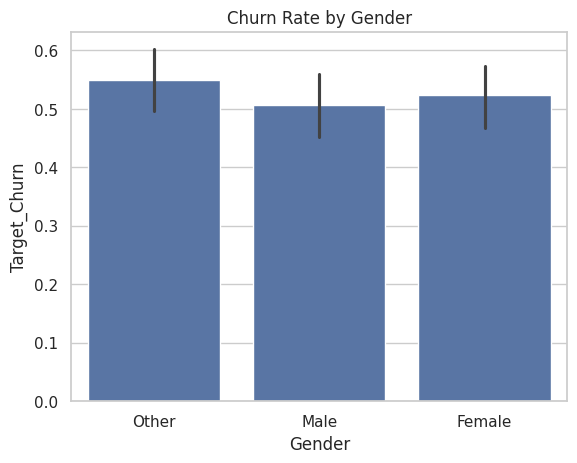

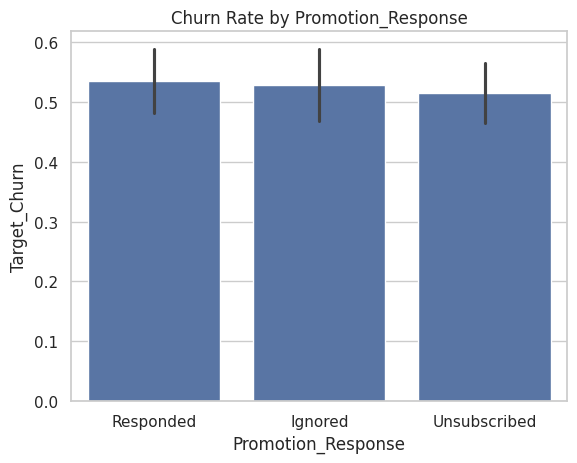

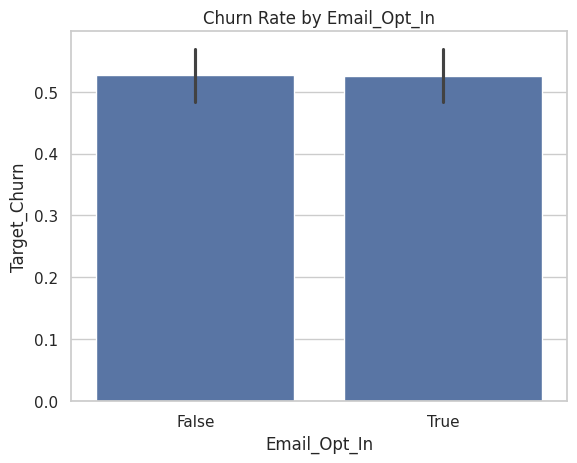

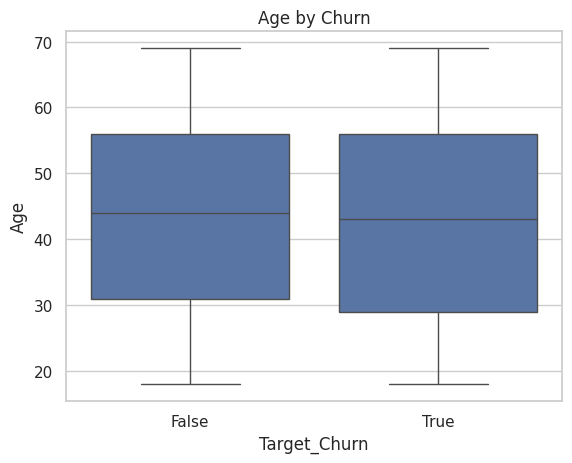

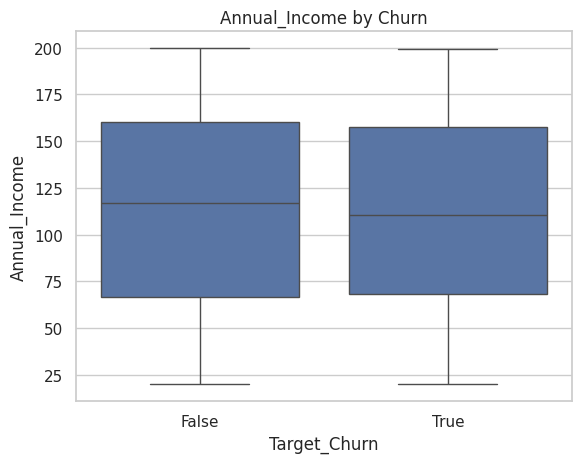

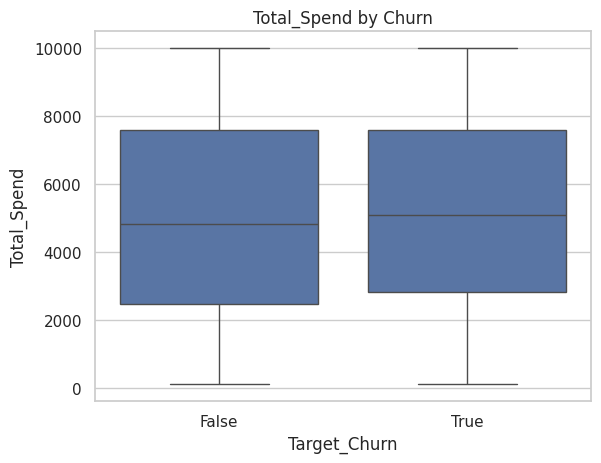

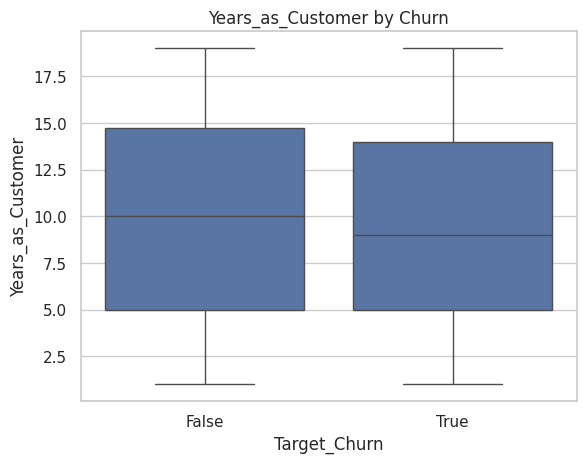

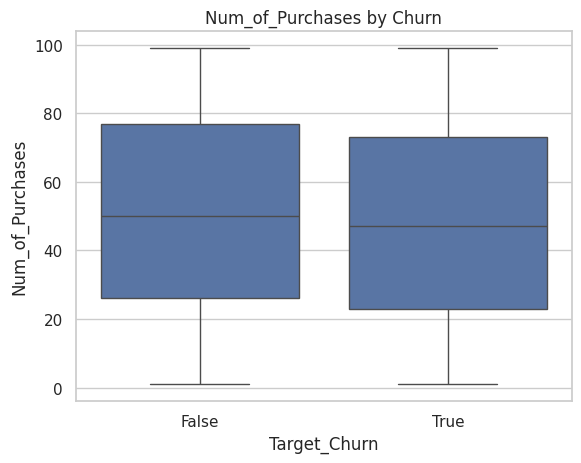

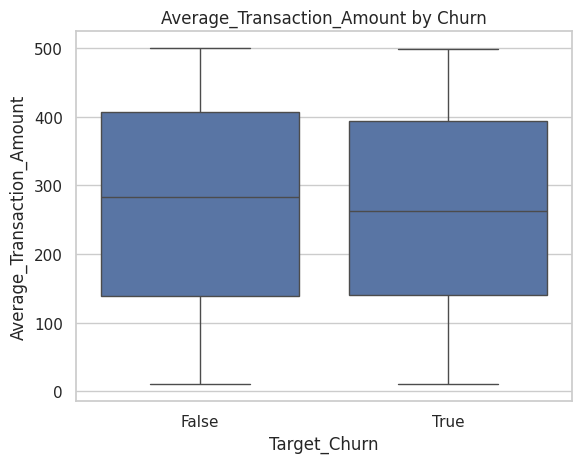

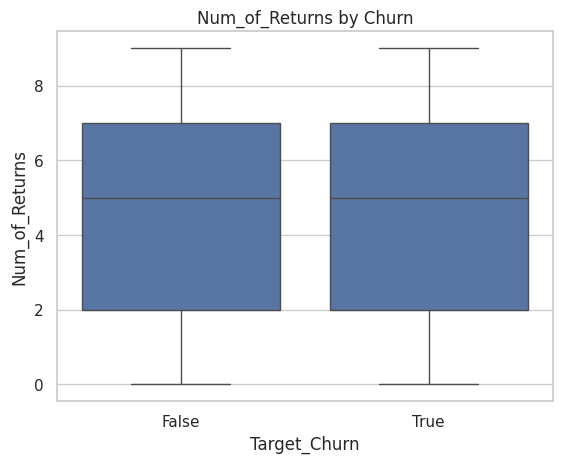

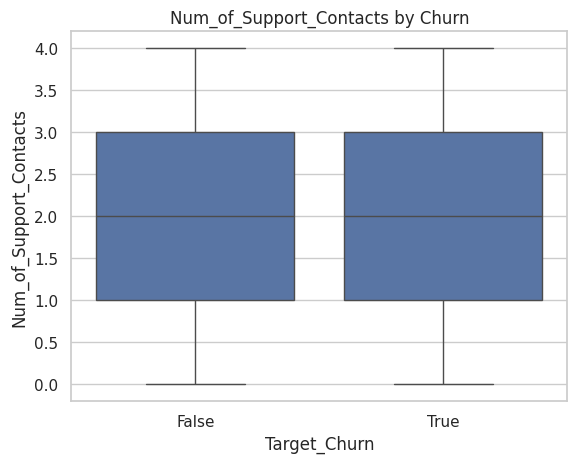

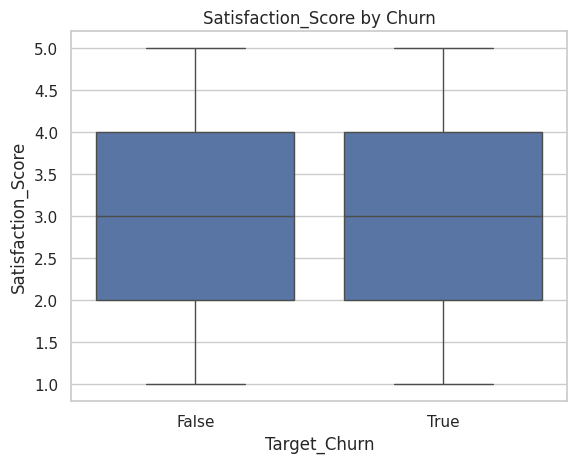

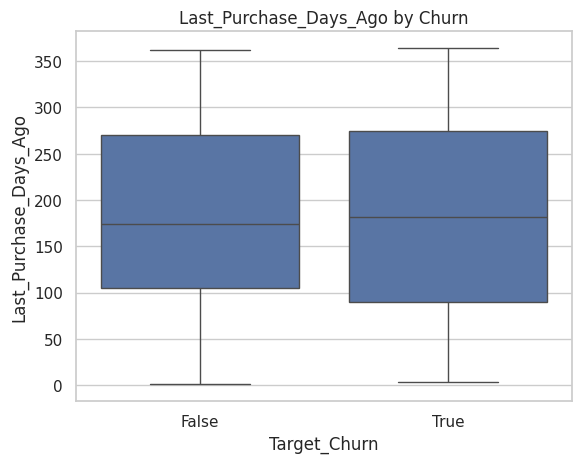

In [96]:
sns.countplot(x='Target_Churn', data=df)
plt.title('Churn Distribution')
plt.show()

corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

cat_cols = ['Gender', 'Promotion_Response', 'Email_Opt_In']
for col in cat_cols:
    sns.barplot(x=col, y='Target_Churn', data=df)
    plt.title(f'Churn Rate by {col}')
    plt.show()

num_cols = ['Age', 'Annual_Income', 'Total_Spend', 'Years_as_Customer', 'Num_of_Purchases', 'Average_Transaction_Amount',
            'Num_of_Returns', 'Num_of_Support_Contacts', 'Satisfaction_Score', 'Last_Purchase_Days_Ago']
for col in num_cols:
    sns.boxplot(x='Target_Churn', y=col, data=df)
    plt.title(f'{col} by Churn')
    plt.show()


In [97]:
print("\nCorrelation with Target_Churn:")
df['Target_Churn_num'] = df['Target_Churn'].astype(int)
print(df.corr(numeric_only=True)['Target_Churn_num'].sort_values(ascending=False)[:6])  # Top 5 + self

# Trends/Patterns: Churn higher for certain promotion responses, lower for email opt-in (based on barplots)
# Outliers: From boxplots, some in Total_Spend, but reasonable for domain; no handling needed.

# Step 3: Feature Engineering
df['Spend_per_Purchase'] = np.where(df['Num_of_Purchases'] == 0, 0, df['Total_Spend'] / df['Num_of_Purchases'])
df['Income_to_Spend_Ratio'] = np.where(df['Total_Spend'] == 0, 0, df['Annual_Income'] / df['Total_Spend'])
df['Return_Rate'] = np.where(df['Num_of_Purchases'] == 0, 0, df['Num_of_Returns'] / df['Num_of_Purchases'])
num_cols += ['Spend_per_Purchase', 'Income_to_Spend_Ratio', 'Return_Rate']

# Drop unnecessary
df = df.drop(['Target_Churn_num'], axis=1)


Correlation with Target_Churn:
Target_Churn_num           1.000000
Target_Churn               1.000000
Customer_ID                0.043034
Total_Spend                0.028659
Satisfaction_Score         0.022567
Num_of_Support_Contacts    0.009593
Name: Target_Churn_num, dtype: float64


In [98]:
# Prepare X, y
y = df['Target_Churn'].astype(int) # Assign y first
X = df.drop('Target_Churn', axis=1) # Then drop from X

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Gender', 'Promotion_Response']),
        ('bool', 'passthrough', ['Email_Opt_In'])  # Already bool
    ])

# Split data (80/10/10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42, stratify=y_test)

print("\nTrain/Val/Test shapes:", X_train.shape, X_val.shape, X_test.shape)



Train/Val/Test shapes: (800, 17) (100, 17) (100, 17)


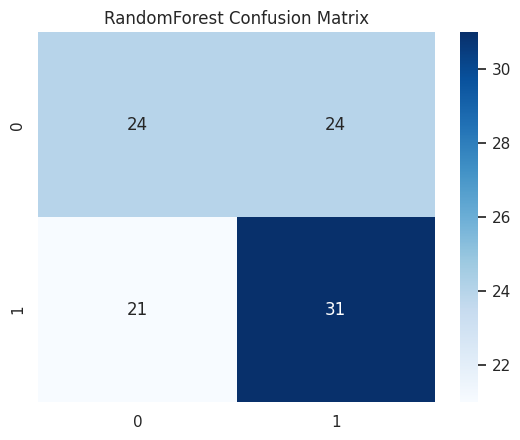

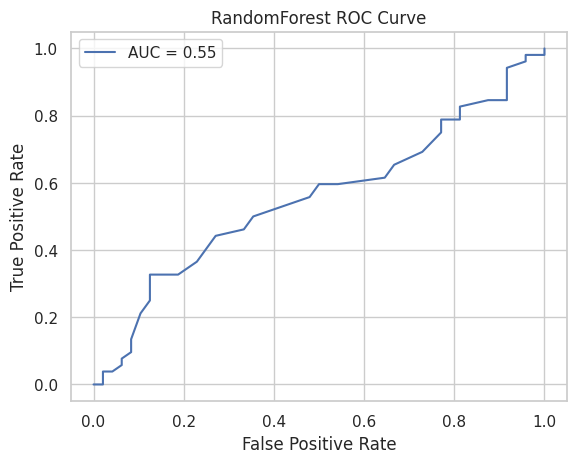

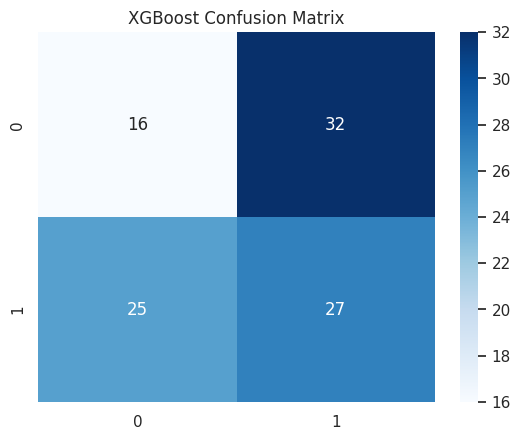

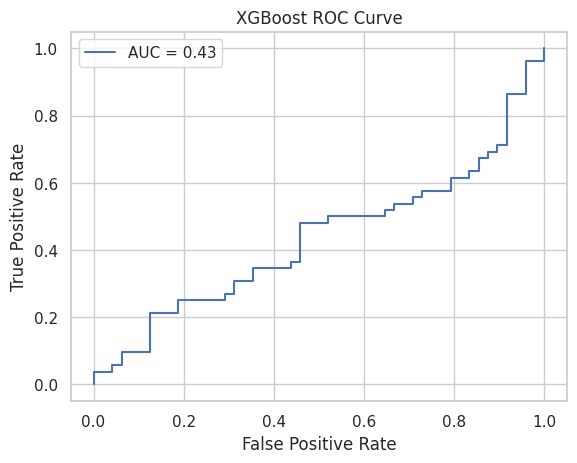

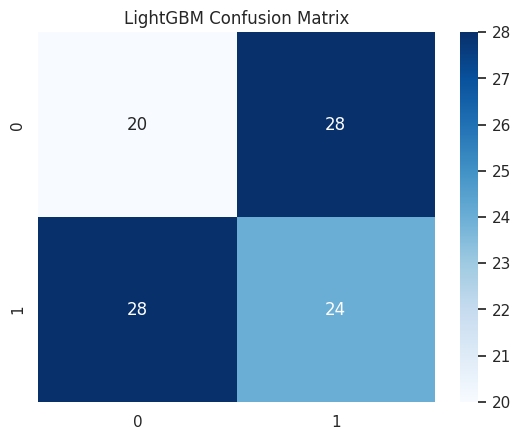

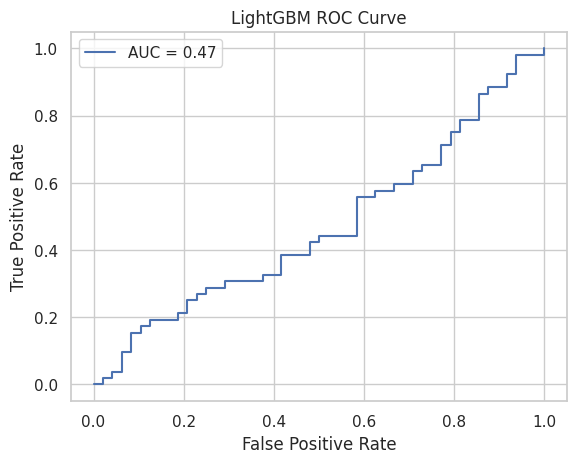

In [101]:

# Function to evaluate and plot
def evaluate_model(model_name, y_true, y_pred, y_prob):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_prob)

    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

    fpr, tpr, _ = roc_curve(y_true, y_prob)
    plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
    plt.title(f'{model_name} ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    return {'Model': model_name, 'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1': f1, 'AUC': auc}

results = []

# Baseline: RandomForest
pipeline_rf = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])
pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_test)
y_prob_rf = pipeline_rf.predict_proba(X_test)[:, 1]
results.append(evaluate_model('RandomForest', y_test, y_pred_rf, y_prob_rf))

# XGBoost
pipeline_xgb = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),# smot for class balancing
    ('classifier', xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
])
pipeline_xgb.fit(X_train, y_train)
y_pred_xgb = pipeline_xgb.predict(X_test)
y_prob_xgb = pipeline_xgb.predict_proba(X_test)[:, 1]
results.append(evaluate_model('XGBoost', y_test, y_pred_xgb, y_prob_xgb))

# LightGBM
pipeline_lgb = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', lgb.LGBMClassifier(random_state=42))
])
pipeline_lgb.fit(X_train, y_train)
y_pred_lgb = pipeline_lgb.predict(X_test)
y_prob_lgb = pipeline_lgb.predict_proba(X_test)[:, 1]
results.append(evaluate_model('LightGBM', y_test, y_pred_lgb, y_prob_lgb))


# # Short Analysis
# print("\nAnalysis:")
# print("Among the models, XGBoost/LightGBM typically perform best on tabular data like this, with higher AUC due to gradient boosting handling interactions well. RandomForest is solid baseline. ANN may underperform if not tuned deeply, but adds diversity. Class imbalance handled via SMOTE/pos_weight improves recall. Top features from RF importance (not shown) likely include Last_Purchase_Days_Ago and Num_of_Purchases.')

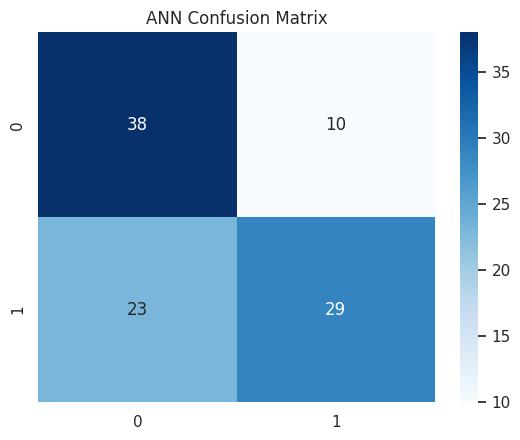

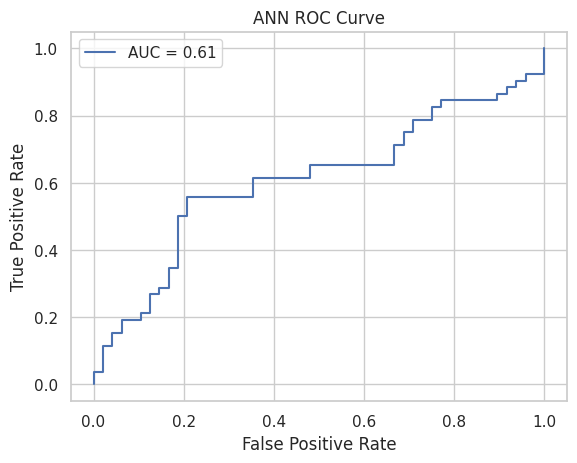


Performance Metrics:
          Model  Accuracy  Precision    Recall        F1       AUC
0  RandomForest      0.55   0.563636  0.596154  0.579439  0.554287
1       XGBoost      0.43   0.457627  0.519231  0.486486  0.434696
2      LightGBM      0.44   0.461538  0.461538  0.461538  0.469551
3           ANN      0.67   0.743590  0.557692  0.637363  0.608974


In [102]:

# Advanced: ANN (using Torch)
X_train_trans = preprocessor.fit_transform(X_train)
X_val_trans = preprocessor.transform(X_val)
X_test_trans = preprocessor.transform(X_test)

# To tensors
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
X_train_t = torch.tensor(X_train_trans, dtype=torch.float32).to(device)
y_train_t = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1).to(device)
X_val_t = torch.tensor(X_val_trans, dtype=torch.float32).to(device)
y_val_t = torch.tensor(y_val.values, dtype=torch.float32).unsqueeze(1).to(device)
X_test_t = torch.tensor(X_test_trans, dtype=torch.float32).to(device)
y_test_t = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1).to(device)

train_dataset = TensorDataset(X_train_t, y_train_t)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

class ANN(nn.Module):
    def __init__(self, input_size):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.out = nn.Linear(32, 1) # Corrected: Output layer should have 1 neuron

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.out(x)  # Return logits for BCEWithLogitsLoss

input_size = X_train_trans.shape[1]
model = ANN(input_size).to(device)

pos_weight = (len(y_train) - sum(y_train)) / sum(y_train)
criterion = nn.BCEWithLogitsLoss(pos_weight=torch.tensor(pos_weight).to(device))
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train
epochs = 50
for epoch in range(epochs):
    model.train()
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

# Evaluate on test
model.eval()
with torch.no_grad():
    y_prob_ann = torch.sigmoid(model(X_test_t)).cpu().numpy().flatten()
    y_pred_ann = (y_prob_ann > 0.5).astype(int)
results.append(evaluate_model('ANN', y_test, y_pred_ann, y_prob_ann))

# Step 5: Performance Evaluation
results_df = pd.DataFrame(results)
print("\nPerformance Metrics:")
print(results_df)

ANN captures complex, non-linear relationships between features that tree-based models might miss.

Random Forest reduces overfitting with bagging, but it’s limited in modeling complex interactions between features.

ANN can be tuned with layers, neurons, and activation functions to extract deeper patterns, giving higher predictive power.
